# Bin packing algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from Box import Box
import random


In [2]:
n = 10

container_width = 10
container_height = 10

In [3]:
def draw_box(ax, box, background_color='lightblue', edge_color='black',alpha=0.5):
    box = Rectangle(box.origin, box.width, box.height, fc=background_color,ec=edge_color,alpha=alpha)
    ax.add_patch(box)

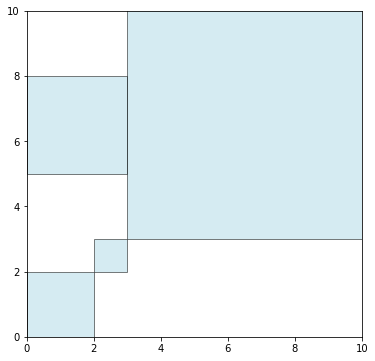

In [4]:
fig, ax = plt.subplots(1,figsize=(6,6))

plt.ylim([0,10])
plt.xlim([0,10])

draw_box(ax, Box(2, 2, (0,0)))
draw_box(ax, Box(1, 1, (2,2)))
draw_box(ax, Box(3, 3, (0,5)))
draw_box(ax, Box(10, 10, (3,3)))

plt.show()

In [5]:
a = Box(width=1, height=40)
b = Box(width=7, height=1, origin=(2,2))
a > b

True

In [6]:
#box_dims = [[1,1] for _ in range(10)]
box_dims = [[1,4],[3,3],[2,1],[1,1],[2,2],[1,2],[1,2]]
boxes = [Box(d[0], d[1]) for d in box_dims]

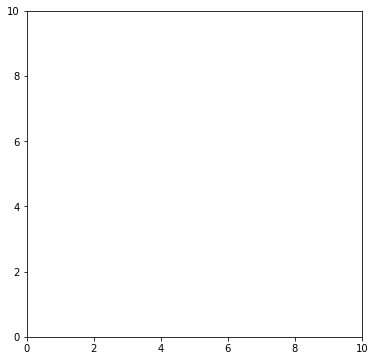

In [7]:
fig, ax = plt.subplots(1,figsize=(6,6))

container_width = 10
container_height = 10

plt.ylim([0,container_height])
plt.xlim([0,container_width])

vertices = [(0,0)]

# for b in boxes:
#     index = random.randint(0,len(vertices)-1)
#     b.origin = vertices[index]
#     vertices.pop(index)
#     vertices += b.coords()[1:]
#     draw_box(ax, b)

plt.show()

In [8]:
def idmax_width(iterable):
    return max([(x.width, x.id) for x in iterable])[1]

def idmax_height(iterable):
    return max([(x.height, x.id) for x in iterable])[1]

def idmax_area(iterable):
    return max([(x.area(), x.id) for x in iterable])[1]

def combined_width(boxes):
    return sum([b.width for b in boxes])

def combined_height(boxes):
    return sum([b.height for b in boxes])

def box_w_id(id):
    return [b for b in boxes if b.id == id][0]

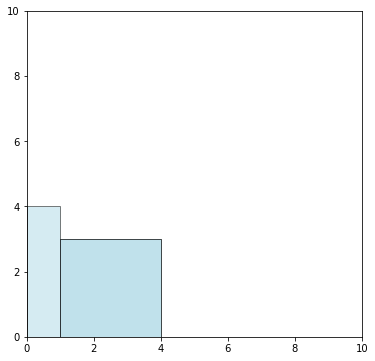

In [9]:
fig, ax = plt.subplots(1,figsize=(6,6))

plt.ylim([0,container_height])
plt.xlim([0,container_width])


max_w_id = idmax_width(boxes)
max_h_id = idmax_height(boxes)

comb_w = combined_width([box_w_id(max_w_id), box_w_id(max_h_id)])

comb_h = combined_height([box_w_id(max_w_id), box_w_id(max_h_id)])

if comb_w < comb_h:
    draw_box(ax, box_w_id(max_h_id))

    box_w_id(max_w_id).origin = box_w_id(max_h_id).coords()[1]
    draw_box(ax, box_w_id(max_w_id))

    box_w_id(max_w_id).origin = box_w_id(max_h_id).coords()[1]
    draw_box(ax, box_w_id(max_w_id))


    # Place the max_height box

plt.show()


In [10]:
box_dims = [[1,4],[3,3],[2,1],[1,1],[2,2],[1,2],[1,2]]

In [3]:
from CCOA import CCOA
from Rectangle import Rect
from Point import Point, PointType

a = CCOA(Rect(0, 3, 1), Point(1,1, PointType.BOTTOM_LEFT), False, None)
print(a.vertices())

[Point(1, 1, PointType.BOTTOM_LEFT, Point(4, 1, PointType.BOTTOM_LEFT, Point(1, 2, PointType.BOTTOM_LEFT, Point(4, 2, PointType.BOTTOM_LEFT]


In [12]:
from CCOA import CCOA, min_distance
from Rectangle import Rect
from Point import Point

a = CCOA(Rect(0, 3, 3),Point(0,0),False)
b = CCOA(Rect(1, 2, 2),Point(5,0),False)
min_distance(a,b)


2.0

In [1]:

from Configuration import Configuration
from CCOA import CCOA, min_distance
from Rectangle import Rect
from Point import Point, PointType

container_width = 10
container_height = 10

initial_origins = [
    Point(0, 0, PointType.BOTTOM_LEFT),
    Point(container_width, 0, PointType.BOTTOM_RIGHT), 
    Point(0,container_height, PointType.TOP_LEFT), 
    Point(container_width, container_height, PointType.TOP_RIGHT)
]

# ccoa = CCOA(Rect(0, 1, 1), Point(0,0,PointType.BOTTOM_LEFT),False, Rect(-1,container_width,container_height))
initial_configuration = Configuration(packed_rects=[],possible_origins=initial_origins)


In [2]:
all_rects = [Rect(0, 1, 1)]

In [3]:
from operator import itemgetter
from copy import copy
current_configuration = initial_configuration

# while 0 < len(current_configuration.possible_origins):
degrees = []
for rect in all_rects:
    for origin_point in current_configuration.possible_origins:
        for rotation in [True, False]:
            ccoa = CCOA(rect=rect, origin=copy(origin_point), rotated=rotation, container=Rect(-1,container_width, container_height))
            d = ccoa.degree(current_configuration.packed_rects)
            degrees.append((d,ccoa))
for i in degrees:
    print(i)
best_degree, rect_to_place = max(degrees,key=itemgetter(0))
print(rect_to_place)
current_configuration.place_rect(rect_to_place)
#current_configuration.possible_ccoas[best]


(-8.0, CCOA(Rect(id=0, w=1, h=1); Point(0, 0, PointType.BOTTOM_LEFT), True))
(-8.0, CCOA(Rect(id=0, w=1, h=1); Point(0, 0, PointType.BOTTOM_LEFT), False))
(-8.0, CCOA(Rect(id=0, w=1, h=1); Point(9, 0, PointType.BOTTOM_RIGHT), True))
(-8.0, CCOA(Rect(id=0, w=1, h=1); Point(9, 0, PointType.BOTTOM_RIGHT), False))
(-8.0, CCOA(Rect(id=0, w=1, h=1); Point(0, 9, PointType.TOP_LEFT), True))
(-8.0, CCOA(Rect(id=0, w=1, h=1); Point(0, 9, PointType.TOP_LEFT), False))
(-8.0, CCOA(Rect(id=0, w=1, h=1); Point(9, 9, PointType.TOP_RIGHT), True))
(-8.0, CCOA(Rect(id=0, w=1, h=1); Point(9, 9, PointType.TOP_RIGHT), False))
CCOA(Rect(id=0, w=1, h=1); Point(0, 0, PointType.BOTTOM_LEFT), True)
REMOVING POINT


In [14]:
from copy import copy

def A0(C, L):
    degrees = [ccoa.degree(C.packed_rects) for ccoa in L]

    id_best = np.argmax(degrees)
    best = L[id_best]

    C_star = copy(C)
    C_star.append(best)

    L_star = copy(L)
    L_star

    return C_star

A0(current_configuration, current_configuration.possible_actions)


NameError: name 'current_configuration' is not defined